### Abstract

* GAN의 놀라운 발전에도 불구하고 복잡한 데이터셋에서 고해상도의 다양한 샘플들을 생성하는 것은 어려움



* 지금까지 시도된 최대 규모에서 GAN을 훈련 시키고, 그러한 scale에서 비롯되는 불안정성을 연구
   * 생성자에 직교 정규화를 적용하면 'trunication trick'을 수용할 수 있게 되어 생성자 입력의 분산을 줄임으로써 샘플 fidelity와 다양성 사이의 균형을 제어할 수 있음

### Introduction

* 본 연구를 통해 ImageNet 데이터셋의 실제 이미지와 생성 이미지 사이의 다양성과 fidelity측면에서의 차이를 줄이고자 함
   * GAN의 성능이 scaling을 통해 극적으로 개선될 수 있음, 규제화를 통해 conditioning을 개선
   * trunication trick에 순응 : 샘플 다양성과 fidelity사이의 trade off를 명확하고 정교하게 제어할 수 있는 간단한 샘플링 기술
   * 대규모 GAN의 불안정성을 발견하고, 경험적으로 특성화 => 새로운 기법과 기존 기법의 조합이 이러한 불안정성을 감소시킬 수 있지만 완벽한 훈련 안정성은 그 성능 대비 비용이 매우 클 때만 달성 가능하다는 것을 입증

### Background

* 많은 연구는 vanilla GAN의 절차를 수정하는 것에 초점을 맞춤


* Spectral Normalization을 통해 D의 Lipschitz 연속성을 보장
   * 다른 연구에서 G에 spectral normalization을 적용시키는 것이 안정성을 향상시킴
   
   
* 모델의 구조 변경 : SA-GAN (G, D의 성능 향상을 위해 self attention 추가)

### Scaling UP GANs

* SA-GAN을 베이스라인 모델로
   * 생성자에 class information 제공 (with class conditional BatchNorm)
   * 배치 사이즈 증가 & 네트워크 층의 채널 수 증가 (파라미터 수 증가)
   
   
* 생성자의 conditional BatchNorm 레이어에 사용되는 class embeding은 다수의 가중치를 보유
   * shared embeding => 학습의 효율성 향상
   
   
* skip-connection
   * cGAN과 달리 입력 노이즈를 최초의 층에만 전달하지 않고, 입력 노이즈 z를 split하여 각 resblock에 전달 (Hierarchical Latent Space)
   
   
* orthogonal regularization : 과적합에 의한 모델 성능 저하 방지

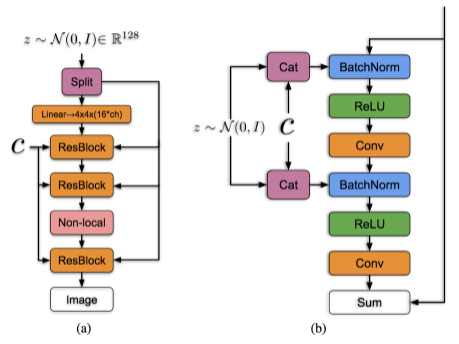

### Trading off Variety and Fidelity with the Truncation Trick


* 대다수의 GAN이 z를 N(0,1)로부터 샘플링하는 방식에 대한 대안 탐색 => Truncated Trick


* N(0, 1)로부터 샘플링한 z값 중 ths를 넘는 것은 다시 샘플링하여 ths안에 포함되도록 함 (z를 truncate하는 것은 퀄리티를 높이지만 다양성을 저해할 수 있음)


* ths가 작을 수록 노이즈의 분산이 작아짐
   * ths가 최소일때는 다양성이 손실, 최대일때는 질이 떨어짐
   
   
   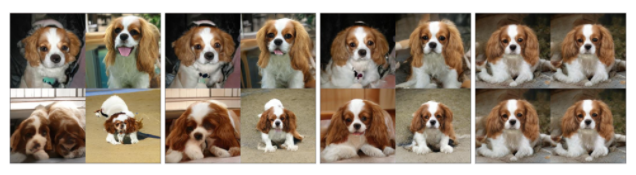
   
   
   * 오른쪽으로 갈 수록 ths값이 작아짐

* ths를 작게 하면 IS와 FID가 크게 되므로 적당한 ths를 찾을 필요가 있음
   * Truncated Trick에서 orthogonal regularization을 할 필요가 있다는 맥락

#### summary


* 배치 사이즈, 채널 수를 증가시켜 스코어 상승


* shared embedding, hierarchical latent space, orthogonal regularization으로 스코어 상승


* truncated trick으로 적당한 ths를 선택할 필요가 있음

### Analysis

* 512x512같은 고해상도 이미지 생성시 학습을 진행하면 collapse의 위험이 있기 때문에 early stopping을 실시할 필요가 있음

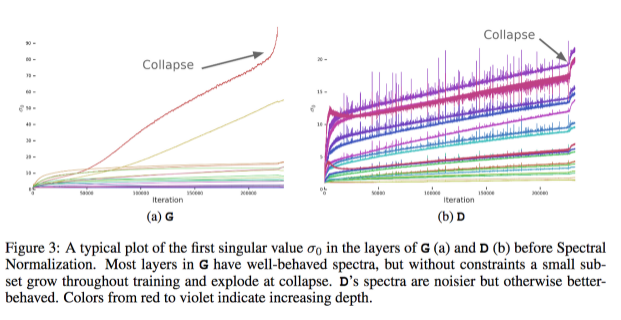

#### Characterizing Instability : The Generator

* 작은 scale에서는 안정적이지만 대규모 scale에서 발생하는 불안정성이 관심 대상


* 학습 동안의 가중치 범위, 기울기, 손실 통계량을 관찰
   * 가중치 행렬의 상위 3개의 특이값(singular value)들이 most informative하다는 것을 확인
   

* fig3에서 확인할 수 있듯 대부분의 레이어에서는 문제가 없으나 특정 레이어들(생성자의 첫번째 레이어)에서 spectral explosion이 발생
   * 상위 3개의 특이값에 대해 규제화 적용
   
   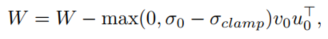
   
   
* 위와 같은 규제화가 gradual increase와 explosion을 방지

#### Characterizing Instability : The Discriminator

* 판별자의 spectra에서의 spike는 판별자가 일시적으로 굉장히 큰 기울기를 받는다는 것을 의미함 (주로 상위 몇 개의 특이값들에 해당함)


* 위와 같은 상황을 방지하고자 gradient penalty 적용 (D의 자코비안 행렬이 급격하게 변하는 것을 방지)


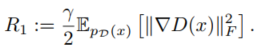



* 판별자의 손실함수에 zero-centered gradient penalty를 적용하여, 추가적인 안정화 시도  but 학습이 안정되어도 IS가 45%감소하는 현상 발생


**충분한 제약은 학습의 안정성에 기여할 수 있으나 성능의 수준을 저해할 수 있다**

### Experiments

* 보통 평가지표로 IS, FID를 활용하나 Truncated Trick을 실시하는 만큼 세 항목의 지표를 추가함


1. FID가 최소일때의 FID / IS (min FID / IS)


2. IS가 최대일때의 FID / IS (FID / max IS)


3. FID가 낮고 IS가 최대일때의 FID / IS (FID / valid IS)

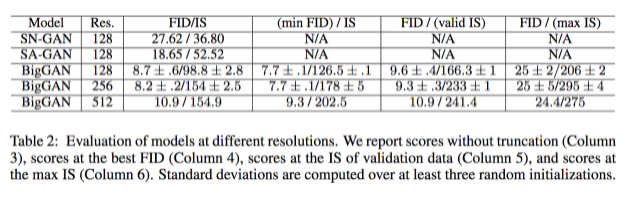


* 3번째 열처럼 truncated trick을 적용하지 않아도 갱신이 잘 되고 있음


* 어느정도 낮은 FID를 가지면 IS도 꽤 높은 수준의 학습이 가능하나, 라벨에 따라서는 잘 생성되어 출력된다고 할 수 없음 (아래 그림의 b처럼 인물 라벨의 경우 깔끔하게 생성이 안됨)

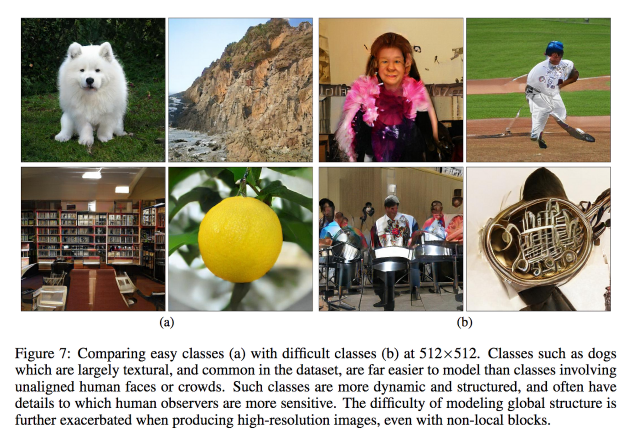

#### Appendix

* Inception 스코어, Frechet Inception Distance(FID)는 GAN의 생성 이미지의 품질을 측정하는 지표


* Inception 스코어는 식별 네트워크의 인식 용의성과 생성 이미지의 다양성이라는 두 개의 관점을 고려하는 지표로, 값이 높을 수록 높은 품질을 의미


* FID는 Inception 스코어에서 고려되지 않았던 식별대상으로써의 실제 이미지를 고려한 지표, 값이 낮을 수록 고품질임의 의미

